In [23]:
import torch
import pickle
import matplotlib.pyplot as plt

In [27]:
shp_original_img = (100, 100)
broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p', 'rb'),encoding='latin1'))

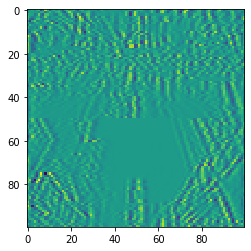

In [28]:
plt.imshow(broken_image.view(100,100))

In [34]:
def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter) :
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0)
        h = filt[0]*h + filt[2]*h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
    return h

In [35]:
# 가설과 오염된 이미지 사이의 오차 계산
# torch.dist() 두 텐서 사이의 거리를 구하는 함수

def distance_loss(hypothesis, broken_image) :
    return torch.dist(hypothesis, broken_image)

In [36]:
# 무작위 값을 가진 텐서 생성
# torch.randn()
random_tensor = torch.randn(10000, dtype = torch.float)

In [37]:
# lr = learning rate 학습률, 학습을 얼마나 급하게 진행하는가
# 너무 클 경우 최소값을 찾지 못하고, 너무 작으면 학습속도나 느려짐

lr = 0.8
for i in range(0, 20000) :                              #2만번 실시
    random_tensor.requires_grad_(True)                  # 오차함수 미분실시
    hypothesis = weird_function(random_tensor)          # 가설 이미지 생성
    loss = distance_loss(hypothesis, broken_image)      # 오차 비교(broken_image - 가설)
    loss.backward()                                     # 미분 : loss를 random_tensor로 미분
    
    # 경사하강법을 직접 구현하므로, torch.no_grad() 자동 기울기 계산 비활성화
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad  # 학습률 적용
        
    # 1000번마다 출력
    # 5천번 정도로는 결과 잘 안나온다
    if i % 1000 == 0 :
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.100542068481445
Loss at 1000 = 1.183429479598999
Loss at 2000 = 0.5581094026565552
Loss at 3000 = 0.37772464752197266
Loss at 4000 = 0.2953444719314575
Loss at 5000 = 0.24630732834339142
Loss at 6000 = 0.21177938580513
Loss at 7000 = 0.1846221685409546
Loss at 8000 = 0.1616402268409729
Loss at 9000 = 0.14124201238155365
Loss at 10000 = 0.12256252020597458
Loss at 11000 = 0.10509321838617325
Loss at 12000 = 0.0885140672326088
Loss at 13000 = 0.07261168956756592
Loss at 14000 = 0.05723864585161209
Loss at 15000 = 0.04228966310620308
Loss at 16000 = 0.027690786868333817
Loss at 17000 = 0.02115766890347004
Loss at 18000 = 0.021165993064641953
Loss at 19000 = 0.021167313680052757


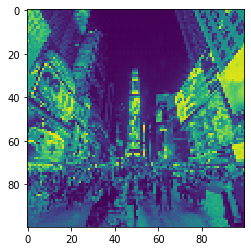

In [38]:
# 결과 출력

plt.imshow(random_tensor.view(100,100).data)